# Function transformations in JAX

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

## Just-in-time compilation with `jax.jit`

With just-in-time compilation JAX can generate compiled versions of Python functions that run on GPUs/TPUs if available and otherwise on the CPU. This can yield substantial performance gains.

Let's define an example function:

In [2]:
def f(x):
    return x*x

Now we can get a compiled version of the function with

In [3]:
f_jitd = jax.jit(f)

In [4]:
f(3)-f_jitd(3)

DeviceArray(0, dtype=int32)

#### Remarks
* The function returned by `jax.jit` is only compiled at the point when it is first called.
* The function is compiled for fixed shapes of the arguments that are given at the first call. Therefore, the first call can take substantially longer than subsequent calls.
* Calling a compiled function with different argument shapes will cause re-compilation.

## Automatic differentiation with `jax.grad`

In [16]:
df = jax.grad(f)
ddf = jax.grad(jax.grad(f))

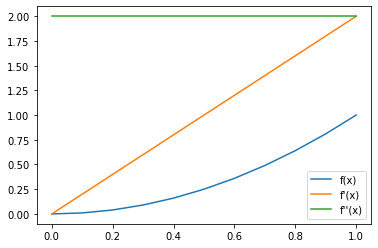

In [19]:
x_list = jnp.arange(0,1.1,.1)
f_values = jnp.array([f(x) for x in x_list])
df_values = jnp.array([df(x) for x in x_list])
ddf_values = jnp.array([ddf(x) for x in x_list])

plt.plot(x_list, f_values, label="f(x)")
plt.plot(x_list, df_values, label="f'(x)")
plt.plot(x_list, ddf_values, label="f''(x)")
plt.legend();

## Vectorization with `jax.vmap`

In [24]:
df_vmapd = jax.vmap(df)

In [25]:
x_list = jnp.arange(0,1.1,.1)

df_values = jnp.array([df(x) for x in x_list])

df_values_with_vmap = df_vmapd(x_list)

df_values - df_values_with_vmap

DeviceArray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)